In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import h5py as h5

#Quick fudge to make import from ../Scripts work
sys.path.append('../../Scripts')

#Custom imports
# for color map
import seaborn as sns
# for reading datafiles 
import pandas as pd

# import script that has formation channel classification functions:
from PostProcessingScripts import * 

import ClassCOMPAS     as CC ###


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [5]:
print(BPSnameslist)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T']


In [6]:
MSSFRnameslist = []
MSSFRnameslist.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate(GSMFs):
    ind_y = ind_GSMF + 1
    for ind_MZ, MZ in enumerate(MZs):
        ind_z = ind_MZ +1
        for ind_SFR, SFR in enumerate(SFRs):
            ind_x = ind_SFR+1
            
            
            
            
        

            MSSFRnameslist.append('%s%s%s'%(ind_x, ind_y, ind_z))

print(MSSFRnameslist)
MSSFRnameslistWantedOrder = []
MSSFRnameslistWantedOrder.append('000') # add phenomenological 

for ind_GSMF, GSMF in enumerate([0,1,2]):
    ind_x = ind_GSMF + 1
    for ind_MZ, MZ in enumerate([0,1,2]):
        ind_y = ind_MZ +1
        for ind_SFR, SFR in enumerate([0,1,2]):
            ind_z = ind_SFR+1
            
            
            
            
        

            MSSFRnameslistWantedOrder.append('%s%s%s'%(ind_x, ind_y, ind_z))
            
            
print(MSSFRnameslistWantedOrder)


indexlist = np.asarray(range(28))
print(indexlist)
indexOrderedToOldMSSFR = []
for mssfr in MSSFRnameslistWantedOrder:
    mask = (np.asarray(MSSFRnameslist)==mssfr)
    ind_map = indexlist[mask]
    indexOrderedToOldMSSFR.append(int(ind_map[...].squeeze()))
    
    
print(indexOrderedToOldMSSFR)



dictOldmssfrINDtoNEWmssfrIND = {MSSFRnameslist[i]: indexOrderedToOldMSSFR[i] for i in range(len(MSSFRnameslist))}

['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
['000', '111', '112', '113', '121', '122', '123', '131', '132', '133', '211', '212', '213', '221', '222', '223', '231', '232', '233', '311', '312', '313', '321', '322', '323', '331', '332', '333']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
[0, 1, 4, 7, 10, 13, 16, 19, 22, 25, 2, 5, 8, 11, 14, 17, 20, 23, 26, 3, 6, 9, 12, 15, 18, 21, 24, 27]


In [7]:
# nModels=17
# BPSnameslist = list(string.ascii_uppercase)[0:nModels]

# physicalNamesBPSmodelsWithEnter = [r'\textbf{fiducial}',\
#                            r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable}' + '\n'+ r'\textbf{case BB}',\
#                            r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'\textbf{optimistic}' +'\n' + r'\textbf{CE}',\
#                           r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$3.0\,\rm{M}_{\odot}$',\
#                           r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$30\,\rm{km}\,\rm{s}^{-1}$',\
#                           r'\textbf{SN} '+ r'$v_{\rm{k,BH}}$' +'\n' + r'$0\,\rm{km}\,\rm{s}^{-1}$' , r'$\rm{f}_{\rm{WR}} = 0.1$', r'$\rm{f}_{\rm{WR}} = 5$']

# alphabetPhysicalNameDictWithEnter =  {BPSnameslist[i]: physicalNamesBPSmodelsWithEnter[i] for i in range(len(BPSnameslist))}





def plot_kdes(axe=None, axe_ind=None, xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS', xvarrange=None, \
                               whichWeight='det', path_dir='/Volumes/Andromeda/DATA/AllDCO_bugfix/'):
    
  
    """ 
    plot total mass distribution with channels 
    input:
    
    axe = the axis to plot it on
    xvar= the array of data that you want to plot the kde of
    bw_method = bandwith method of the kernel density function you want to use (see class gaussian_kde())
    xvarrange, the x-axis range to use for the kde [should be typically slightly larger than the range of xvar]
    xlabel, ylabel = x and y labels of the plot
    xlim, ylim = xlim and ylim of the plot axis 
    """
    
    # constants
    Zsolar=0.0142
    lw = 2
    nSFRD = 28 # number of SFRD models 
    
    
    MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']
 

    DCOname_dict = {'BHNS':'BHNS', 'BBH':'BHBH', 'BNS':'NSNS'}
    DCOname = DCOname_dict[DCOtype]
#     xvarHeaders = ['Mass1', 'Mass2', 'tc',\
#                'log10(tc)', 'TotMass', 'ChirpMass', 'q', 'metallicitySystems', 'log10metallicitySystems', 'tdelay',\
#                'log10(tdelay)']
    xvar_dict = {'Mtot':4,'Mass1':0, 'Mass2':1, 'q':6, 'ChirpMass':5, 'logZ':8, 'Z':7, 'tc':2, 'log10(tc)':3, 'tdelay':9, 'log10(tdelay)':10 }


    for ind_m, BPSmodelName in enumerate(BPSnameslist):
        color_m = colorDirDict[BPSmodelName]
        
        axe = ax[ind_m,axe_ind]
        
        
        
        if ind_m==0:
            print('now at m=', BPSmodelName)

        

        

        # data for KDE / PDF:
        path_ = path_dir + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'   
        print(path)
        fdata = h5.File(path)

            

        if xparam in ['Mass1', 'Mass2', 'q', 'ChirpMass', 'Mtot']:

            # obtain BH and NS masses
            xvar1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
            xvar2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
            M1, M2 = obtainM1BHandM2BHassymetric(m1=xvar1, m2=xvar2) # M1 will be the most massive, M2 the least massive compact object. 
            del xvar1
            del xvar2
            if xparam =='Mtot':
                xvar=M1+M2
            elif xparam=='Mass1':
                xvar = M1
            elif xparam=='Mass2':
                xvar = M2 
            elif xparam =='q':
                xvar = M1/M2
            elif xparam=='ChirpMass':
                xvar = chirpmass(M1,M2)

            del M1
            del M2


        elif xparam=='logZ':
            ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            xvar = np.log10((ZZ))
            del ZZ 

        elif xparam=='Z':
            ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
            xvar = ((ZZ))
            del ZZ


        elif xparam=='tc':
            tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
            xvar = tc / 1000. # in Gyr. 
            del tc

        elif xparam=='tdelay':
            tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
            tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
            xvar = (tc/1000) + (tform / 1000) # in Gyr 
            del tc 
            del tform
        else:
            print('KeyError')





        ymax=0
        ii=0
        print(MSSFRmodelNames)
        for ind_mssfr, mssfr in enumerate([MSSFRmodelNames[0]]):
            # read in MSSFR weights: 
            if whichWeight=='det':
                # get detected weights
                fparam_key = 'weights_detected'
            elif whichWeight=='z0':
                # get intrinsic weights
                print(r"using intrinsic $z=0$ weights")
                fparam_key = 'weights_intrinsic'

            weightheader = 'w_' + mssfr
            w = fdata[fparam_key][weightheader][...].squeeze()

            # highlight the SFRD if they are one of the following 3
            if mssfr in ['000', '231', '312']:
                MSSFRalpha=1
                if mssfr=='000':
                    MSSFRzorder = 57
                    MSSFRlinestyle = MSSFRlinestyles[0]                    
                elif mssfr=='231':
                    MSSFRzorder=55
                    MSSFRlinestyle = MSSFRlinestyles[1]
                elif mssfr=='312':
                    MSSFRzorder=54
                    MSSFRlinestyle = MSSFRlinestyles[2]
            else:
                MSSFRalpha=0.5
                MSSFRlinestyle = '-'
                MSSFRzorder=51   






            # make the KDE, by calculating KDE values for the following x points 
            xx_boot = np.linspace(xvarrange[0],xvarrange[1],100)

#             # set bandwidth (dimensionless) based on the no of samples in the data. 
            lenXvar = len(xvar)
            if lenXvar<=100000:
                bw=0.1
            elif lenXvar>2*10**6:
                bw = 0.04
            elif (lenXvar<=2*10**6) & (lenXvar>10**6):
                bw = 0.04
            elif (lenXvar<=10**6) & (lenXvar>5*10**5):
                bw = 0.05 
            elif (lenXvar<=5*10**5) & (lenXvar>10**5):
                bw = 0.06
            else:
                print('error!! bw not defined')
#             bw = 4# TEMP 

            # for metallicity we want a seperate, larger KDE bandwidth, since here the resolution is limited by our no of Zi grid points
            if xparam=='logZ':
                bw = 0.1
            if (mssfr=='000')&(axe_ind==0):
                print('Model ', BPSmodelName, 'with %s DCOs is given a kde bandwidth of '%len(xvar),  'bw=', bw)

            KDE = gaussian_kde(xvar, weights=w, bw_method=bw)
            yy_boot = KDE(xx_boot)
            del KDE 

            axe.plot(xx_boot, yy_boot, alpha=MSSFRalpha, color=color_m, zorder=MSSFRzorder, label=None,\
                     linewidth=lw, linestyle=MSSFRlinestyle ) 

            ymax = np.max(np.asarray([ymax,np.max(yy_boot)]))
            ylim_max =ymax*1.05 




            


                
        fdata.close()
        axe.set_ylim(0, ylim_max)

                
    
        del xvar
        del w

        
        
        


    
    return 





In [8]:
def plot_percentiles(axe=None, axe_ind=None, xparam='Mass1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS',  \
                               whichWeight='det', path_dir='/Volumes/Andromeda/DATA/AllDCO_bugfix/', 
                  pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'):
    
    
    # by default available percentiles 
    quantileStrings = ['0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']

    # overall min and max of the percentiles. 
    minq0_005, minq0_05, minq0_25 = 100, 100, 100
    maxq0_75, maxq0_95, maxq0_995 = -10, -10, -10
    
    xvar_dict = {'Mtot':4,'Mass1':0, 'Mass2':1, 'q':6, 'ChirpMass':5, 'logZ':8, 'Z':7, 'tc':2, 'log10(tc)':3, 'tdelay':9, 'log10(tdelay)':10 }
    xvarind = xvar_dict[xparam] 
    
    xright =1+0.05
    xxx = (len(BPSnameslist)+xright)-1
    
    for ind_m, BPSmodelName in enumerate(BPSnameslist):

        color_m = colorDirDict[BPSmodelName]
        
        axe = ax[ind_m,axe_ind]
        dfname = pathQuantiles + 'distribution_percentiles_model_' + DCOtype +'_' + BPSmodelName + '.csv'
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


        
        dx = 0.4 #0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRmodelNames)+1) #+ ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)
        


        for ind_mssfr, MSSFRname in enumerate(MSSFRmodelNames):

            key_  = xparam + '_' + MSSFRname 
            q0_005, q0_05, q0_25 = df.iloc[0:3][key_]# , df.iloc[1][key_], df.iloc[3][key_]
            q0_5  = df.iloc[4][key_]#[ind_mssfr]
            q0_75 = df.iloc[5][key_]#[ind_mssfr]
            q0_95 = df.iloc[7][key_]#[ind_mssfr]
            q0_995= df.iloc[8][key_]#[ind_mssfr]

                  
            
        
            minq0_005 = np.min([minq0_005, q0_005])
            minq0_05 = np.min([minq0_05, q0_05])
            minq0_25 = np.min([minq0_25, q0_25])
            
            maxq0_75 = np.max([maxq0_75, q0_75])
            maxq0_95 = np.max([maxq0_95, q0_95])
            maxq0_995 = np.max([maxq0_995, q0_995])
            
            

            
            for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):
                
                xx = dxrange[ind_mssfr]
                
                if interval=='median':                     
                    axe.scatter(q0_5, xx, \
                                c=np.array([color_m]), s=120, label=None, \
                                marker='.', zorder=200)  
                    
                elif interval =='99percent':
                    zorder = 102
                    yy = [q0_005, q0_995]
                    alpha = 0.15
                elif interval=='90percent':
                    zorder = 105
                    yy = [q0_05, q0_95]
                    alpha = 0.25    
                elif interval=='50percent':
                    zorder = 110
                    yy = [q0_25, q0_75]
                    alpha = 0.4                         
                       
                axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color='white', alpha=1, \
                       height=dxlen, zorder=zorder-1)
                axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color=color_m, alpha=alpha, \
                       height=dxlen, zorder=zorder)

                

    
    return





In [9]:

def make_up_axis(axe=None, axe_ind=0, BPSmodelNames=['A'], xlim=[1,3.], ylim=[0.1,10], nameX='xname', nameY='yname', logY=False, logX=False):
    for ind_bps, bps_name in enumerate(BPSnameslist):
        
        axe = ax[ind_bps, axe_ind]
#         if ind_bps 

                
        if logY==True:
            axe.set_yscale('log')
        if logX==True:
            axe.set_xscale('log')
        if xlim:
            axe.set_xlim(xlim[0], xlim[1])
        if ylim:
            axe.set_ylim(ylim[0], ylim[1])
        
        if bps_name != BPSmodelNames[-1]:
            
            axe.set_xticklabels( () )
            axe.set_xticks([])

            axe.set_yticks([])
            axe.set_yticklabels( () )
            
        
        
        
        
        if  (nameX==None):

            axe.set_xticklabels( () )
            axe.set_xticks([])

        elif (nameY==None):
            axe.set_yticks([])
            axe.set_yticklabels( () )   
            
            
#         if (nameX!=None) & (nameY==None):
#             layoutAxesNoYlabel()

    return 





def make_up_axis_single_ax(axe=None, bps_name='A', BPSmodelNames=['A'], xlim=[1,3.], ylim=[0.1,10], nameX='xname', nameY='yname', logY=False, logX=False):

#         if ind_bps 


    if logY==True:
        axe.set_yscale('log')
    if logX==True:
        axe.set_xscale('log')
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])

#     if bps_name != BPSmodelNames[-1]:

#         axe.set_xticklabels( () )
#         axe.set_xticks([])

#         axe.set_yticks([])
#         axe.set_yticklabels( () )




#     else:
    if  (nameX==None):
        axe.set_xticklabels( () )
        axe.set_xticks([])

    elif (nameY==None):
        axe.set_yticks([])
        axe.set_yticklabels( () )   




    return 



In [7]:





# def mass_distribution_plot(axe=None, axe_ind=None, xparam='M1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS', xvarrange=None, labelname='xlabel name', \
#                               whichWeight='det', path_dir='/Volumes/Andromeda/DATA/AllDCO_bugfix/', quantiles=False,\
#                   pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'):
    

    
    
    
    
#     if quantiles==True:
#         plot_percentiles(axe, axe_ind, xparam, BPSmodelNames, MSSFRmodelNames, DCOtype,  \
#                               whichWeight, path_dir, pathQuantiles)
#     else:# quantiles==True:
#         plot_kdes(axe, axe_ind, xparam, BPSmodelNames, MSSFRmodelNames, DCOtype, xvarrange, \
#                               whichWeight, path_dir)


        

    
    
#     return






In [10]:
def layoutAxesNoXlabel(ax, nameX='', nameY='', \
               labelSizeMajor = 10, fontsize = 25, second=False, labelpad=None, setMinor=True, rotation=0):
    """
    Tiny code to do the layout for axes in matplotlib
    """
    tickLengthMajor = 10
    tickLengthMinor = 5
    tickWidthMajor  = 1.5
    tickWidthMinor  = 1.5
    
    #rc('axes', linewidth=2)
    #label1 always refers to first axis not the twin 
    if not second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label1.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    if second:
        for tick in ax.xaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
        for tick in ax.yaxis.get_major_ticks():
            tick.label2.set_fontsize(fontsize)
            #tick.label1.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.2)
    ax.tick_params(length=tickLengthMajor, width=tickWidthMajor, which='major')
    ax.tick_params(length=tickLengthMinor, width=tickWidthMinor, which='minor')
    # ax.set_xlabel(nameX, fontsize=fontsize,labelpad=labelpad)#,fontweight='bold')
    ax.set_ylabel(nameY, fontsize=fontsize,labelpad=labelpad, rotation=rotation, va="center")#, fontweight='bold')    




    if setMinor==True:
        # add minor ticks:
        ax.xaxis.set_minor_locator(AutoMinorLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())

    return ax

In [24]:
# print(MSSFRnameslist)

# BHBH

now at m= A
/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BBH_A.h5
['000']
using intrinsic $z=0$ weights
Model  A with 8371398 DCOs is given a kde bandwidth of  bw= 0.04
/Volumes/Andromeda/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_25/COMPASCompactOutput_BBH_B.h5
['000']
using intrinsic $z=0$ weights
Model  B with 8616008 DCOs is given a kde bandwidth of  bw= 0.04
/Volumes/Andromeda/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_5/COMPASCompactOutput_BBH_C.h5
['000']
using intrinsic $z=0$ weights
Model  C with 6568454 DCOs is given a kde bandwidth of  bw= 0.04
/Volumes/Andromeda/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_75/COMPASCompactOutput_BBH_D.h5
['000']
using intrinsic $z=0$ weights
Model  D with 6033721 DCOs is given a kde bandwidth of  bw= 0.04
/Volumes/Andromeda/DATA/AllDCO_bugfix/unstableCaseBB/COMPASCompactOutput_BBH_E.h5
['000']
using intrinsic $z=0$ weights
Model  E with 9274636 DCOs is given a kde bandwidth of  bw= 0.04
/Volumes/Androme

KeyboardInterrupt: 

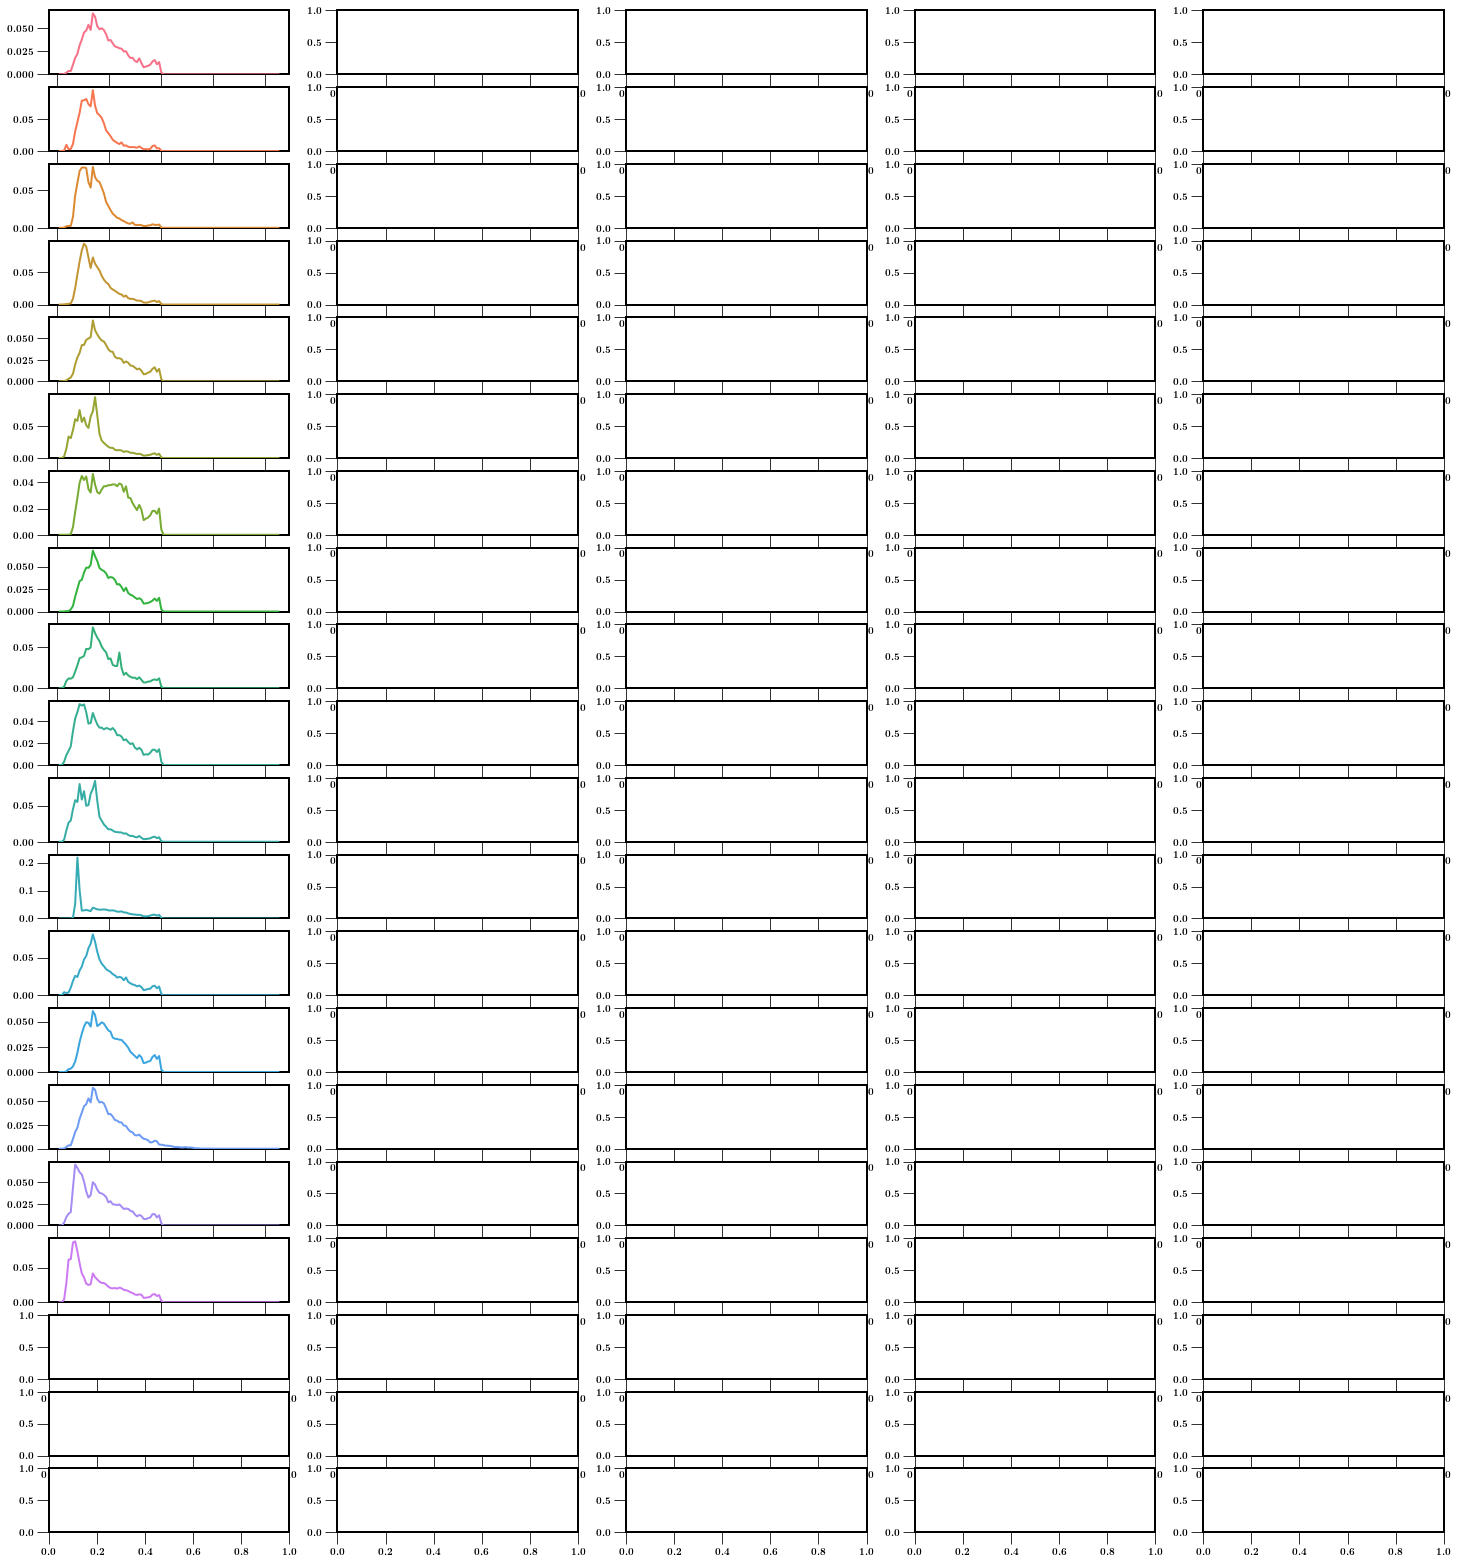

In [13]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 5,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(25,28), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BBH'
DCOtype='BBH'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
# nModels=17  # number of BPS models we are comparing
# BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='z0' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 22



# FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='Mass1', 0,  r' ${m}_{\rm{BH,1}}$ $ \,  [\rm{M}_{\odot}]$'
# plot percentiles:
plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=[BPSnameslist[0]], MSSFRmodelNames=[MSSFRnameslist[0]], DCOtype=DCOtype, xvarrange=[1, 85], \
                              whichWeight=whichWeight, path_dir=path_dir)

xlim=[1.01,69.99]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=True, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=True, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)


    
# ##############################################################
# ## SECOND COLUMN WITH CHIRP MASS ###
# xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
# xlim, ylim=[1.01,69.99], [-0.5, 0.5]
# # ticks and so on 
# make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
# ax2x = ax[0,axe_ind].twiny() # top label 
# make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
# layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${m}_{\rm{BH,1}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,89.99], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


# ##############################################################
# ## FOURTH COLUMN WITH MASS 2 ###
# xparam, axe_ind, xlabelname ='Mass2',  3, r' ${m}_{\rm{BH,2}}$ $ \,  [\rm{M}_{\odot}]$'
# xlim, ylim = [1.0,64.99], [-0.5, 0.5]
# plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
# make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)  # ticks
# layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label 

# ax2x = ax[0,axe_ind].twiny()# top label 
# make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False) # top label 
# layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t) # top label 




# ##############################################################
# ## COLUMN WITH MASS RATIO ###
# xparam, axe_ind, xlabelname ='q', 4 , r' $q = {m}_{\rm{BH,1}} / {m}_{\rm{BH,2}}$ $ \,  [\rm{M}_{\odot}]$'
# plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
# xlim, ylim=[1.0,6.7], [-0.5, 0.5]
# make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# # top label 
# ax2x = ax[0,axe_ind].twiny()
# make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
# layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
plt.savefig('./intrinsic_weight/KDEplot_masses_new_' + whichWeight +'_'  + DCOtype+ '.png', transparent=False)
plt.show()
plt.close()






now at m= A
/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BHNS_A.h5
['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
Model  A with 1525553 DCOs is given a kde bandwidth of  bw= 0.04
/Volumes/Andromeda/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_25/COMPASCompactOutput_BHNS_B.h5
['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
Model  B with 738537 DCOs is given a kde bandwidth of  bw= 0.05
/Volumes/Andromeda/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_5/COMPASCompactOutput_BHNS_C.h5
['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233

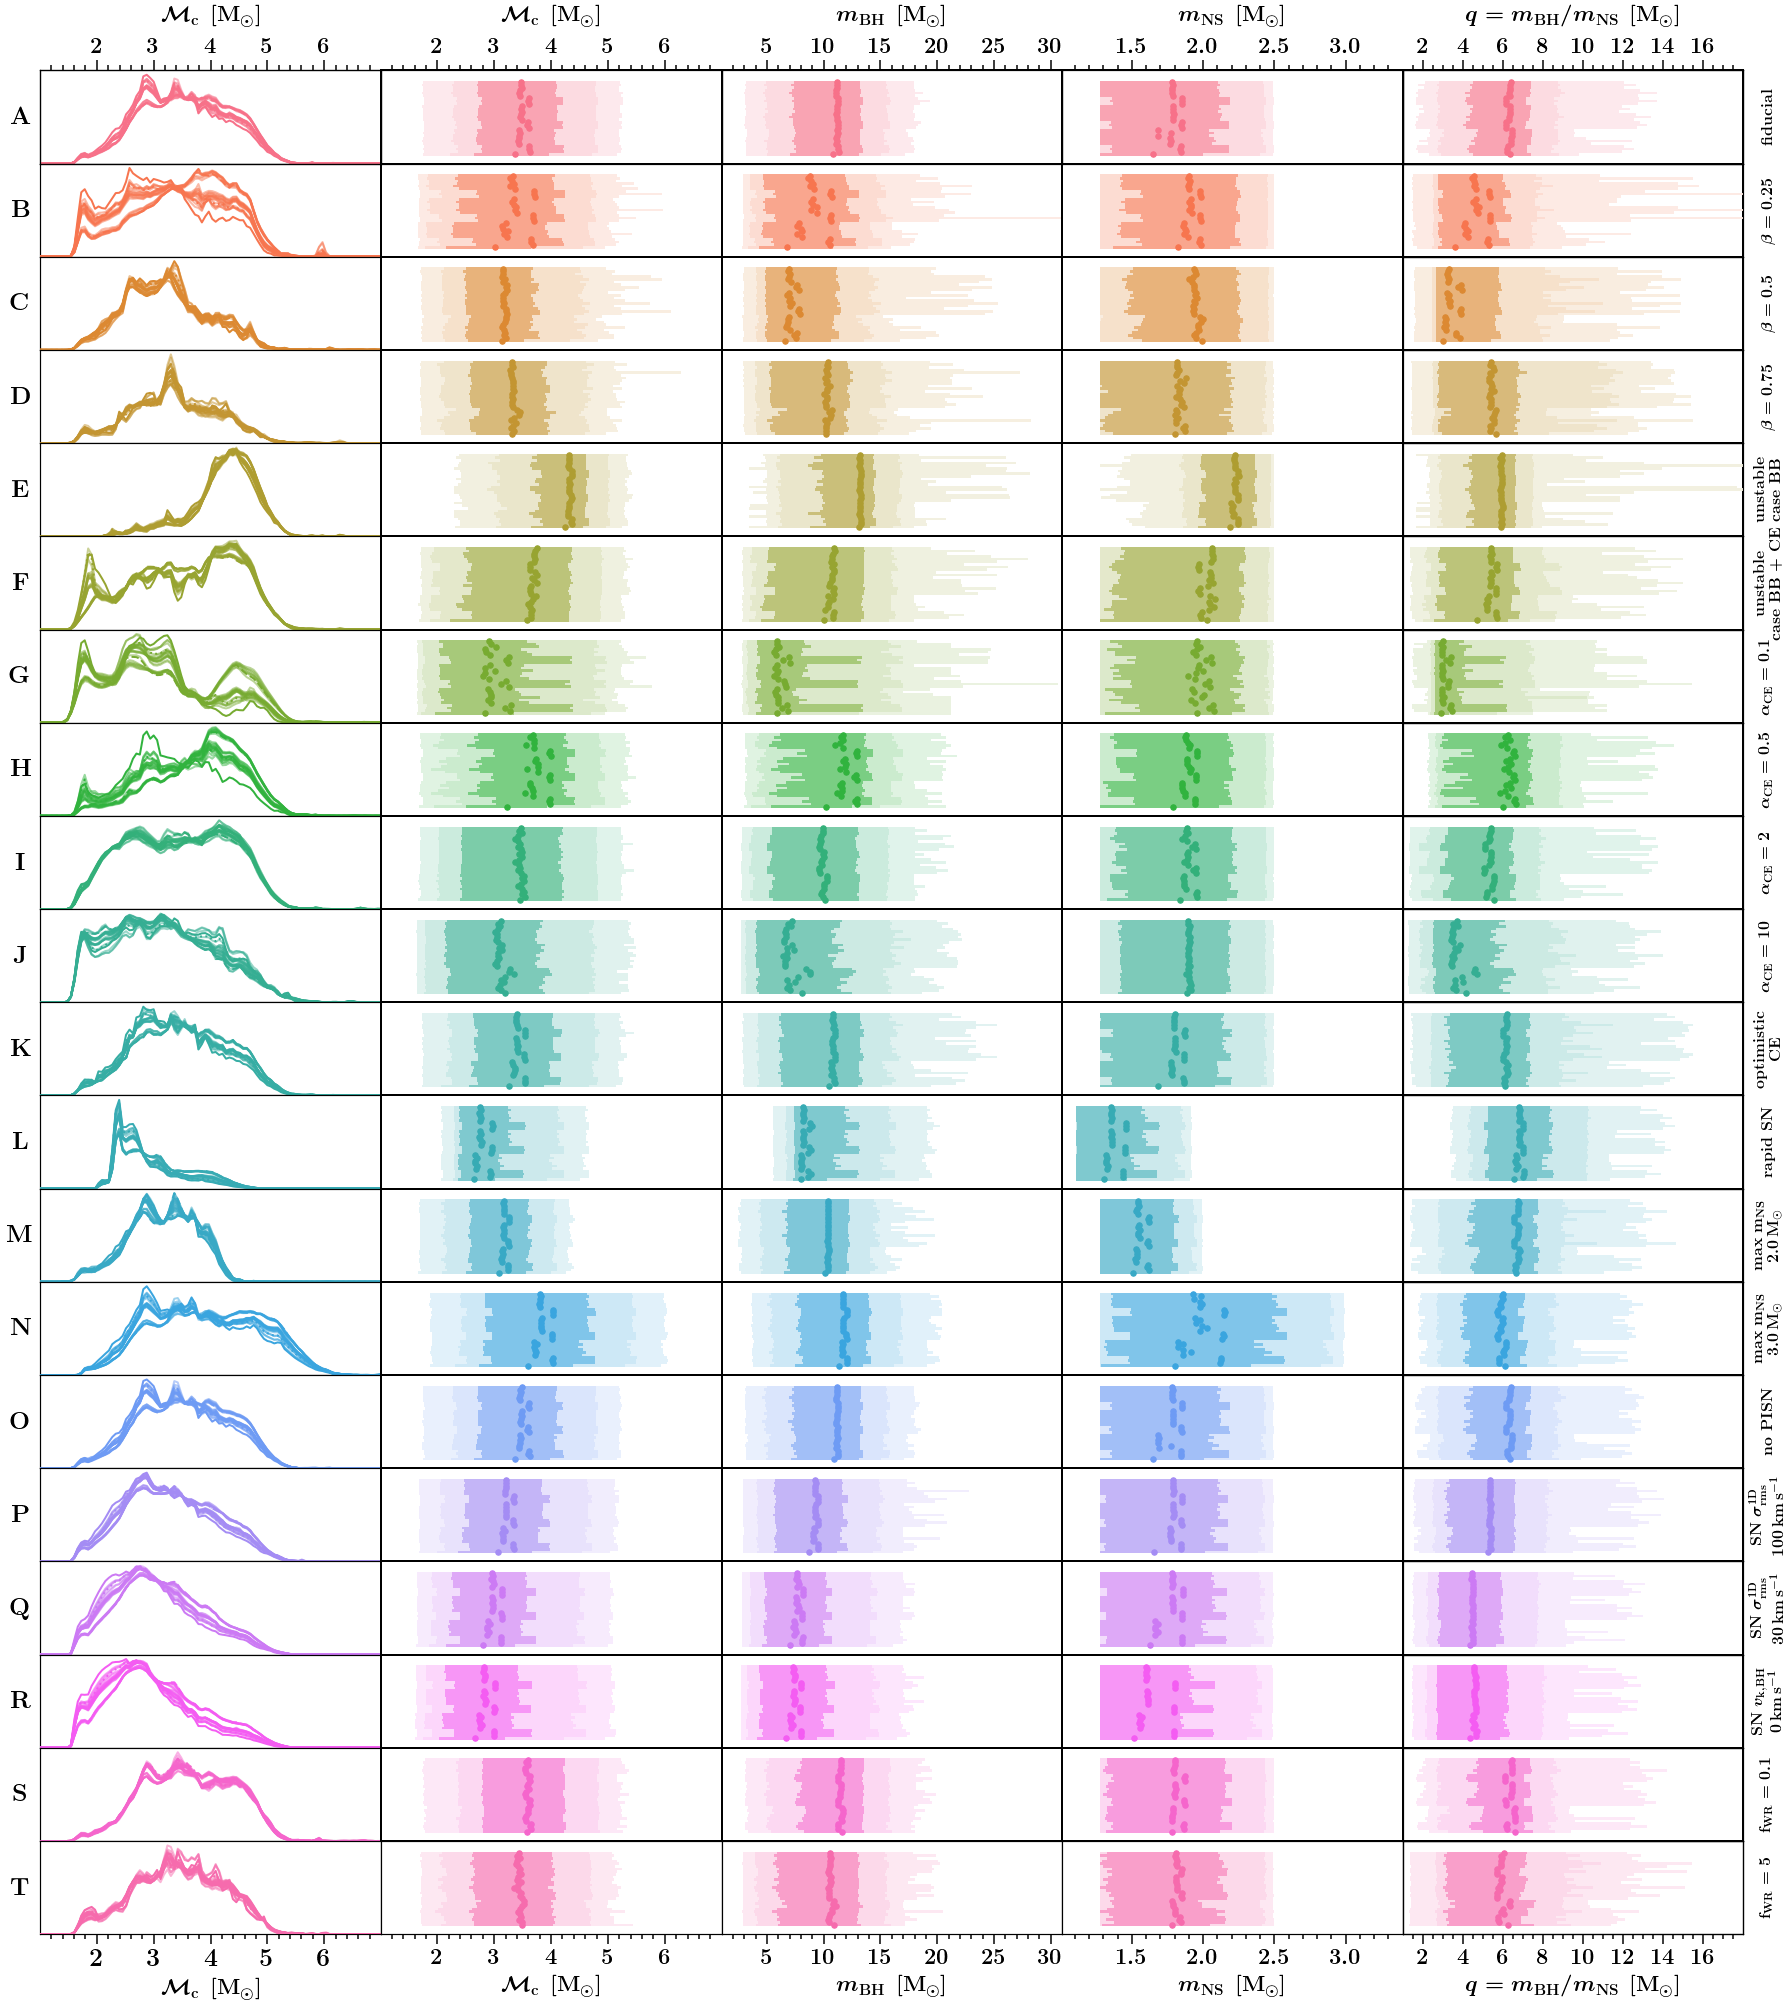

In [25]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'





ncols, nrows= 5,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(25,28), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})



# MSSFRalphas = [1., 0.5, 0.5, 0.5]
# MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

# MSSFRnameslist = ['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']



TYPE = 'BHNS'
DCOtype='BHNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
# nModels=17  # number of BPS models we are comparing
# BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'
fs_t = 22


# FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# plot percentiles:
ylim_max = plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 7], \
                              whichWeight=whichWeight, path_dir=path_dir)

xlim=[1.01,6.999]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)


# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)



## FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
mass_distribution_plot(ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 7],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 
xlim, ylim=[1.01,6.999], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
# bottom label 
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)





## FIRST COLUMN WITH BH MASS ###
xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${m}_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.01,30.99999], [-0.5, 0.5]
mass_distribution_plot(axe=ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 31],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 

make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)




## FIRST COLUMN WITH NS MASS ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${m}_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.01,3.3999], [-0.5, 0.5]
mass_distribution_plot(axe=ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 3],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)

# bottom label 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)








## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {m}_{\rm{BH}} / {m}_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'
mass_distribution_plot(axe=ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 20],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 

xlim, ylim=[1.0,17.99999], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=16)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./intrinsic_weight/KDEplot_masses_' + whichWeight +'_'  + TYPE+ '.png', transparent=False)
plt.show()
plt.close()






In [ ]:
print(BPSnameslist)

# NSNS

now at m= A
/Volumes/Andromeda/DATA/AllDCO_bugfix/fiducial/COMPASCompactOutput_BNS_A.h5
['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
Model  A with 233137 DCOs is given a kde bandwidth of  bw= 0.06
/Volumes/Andromeda/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_25/COMPASCompactOutput_BNS_B.h5
['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '333']
Model  B with 41984 DCOs is given a kde bandwidth of  bw= 0.1
/Volumes/Andromeda/DATA/AllDCO_bugfix/massTransferEfficiencyFixed_0_5/COMPASCompactOutput_BNS_C.h5
['000', '111', '211', '311', '112', '212', '312', '113', '213', '313', '121', '221', '321', '122', '222', '322', '123', '223', '323', '131', '231', '331', '132', '232', '332', '133', '233', '33

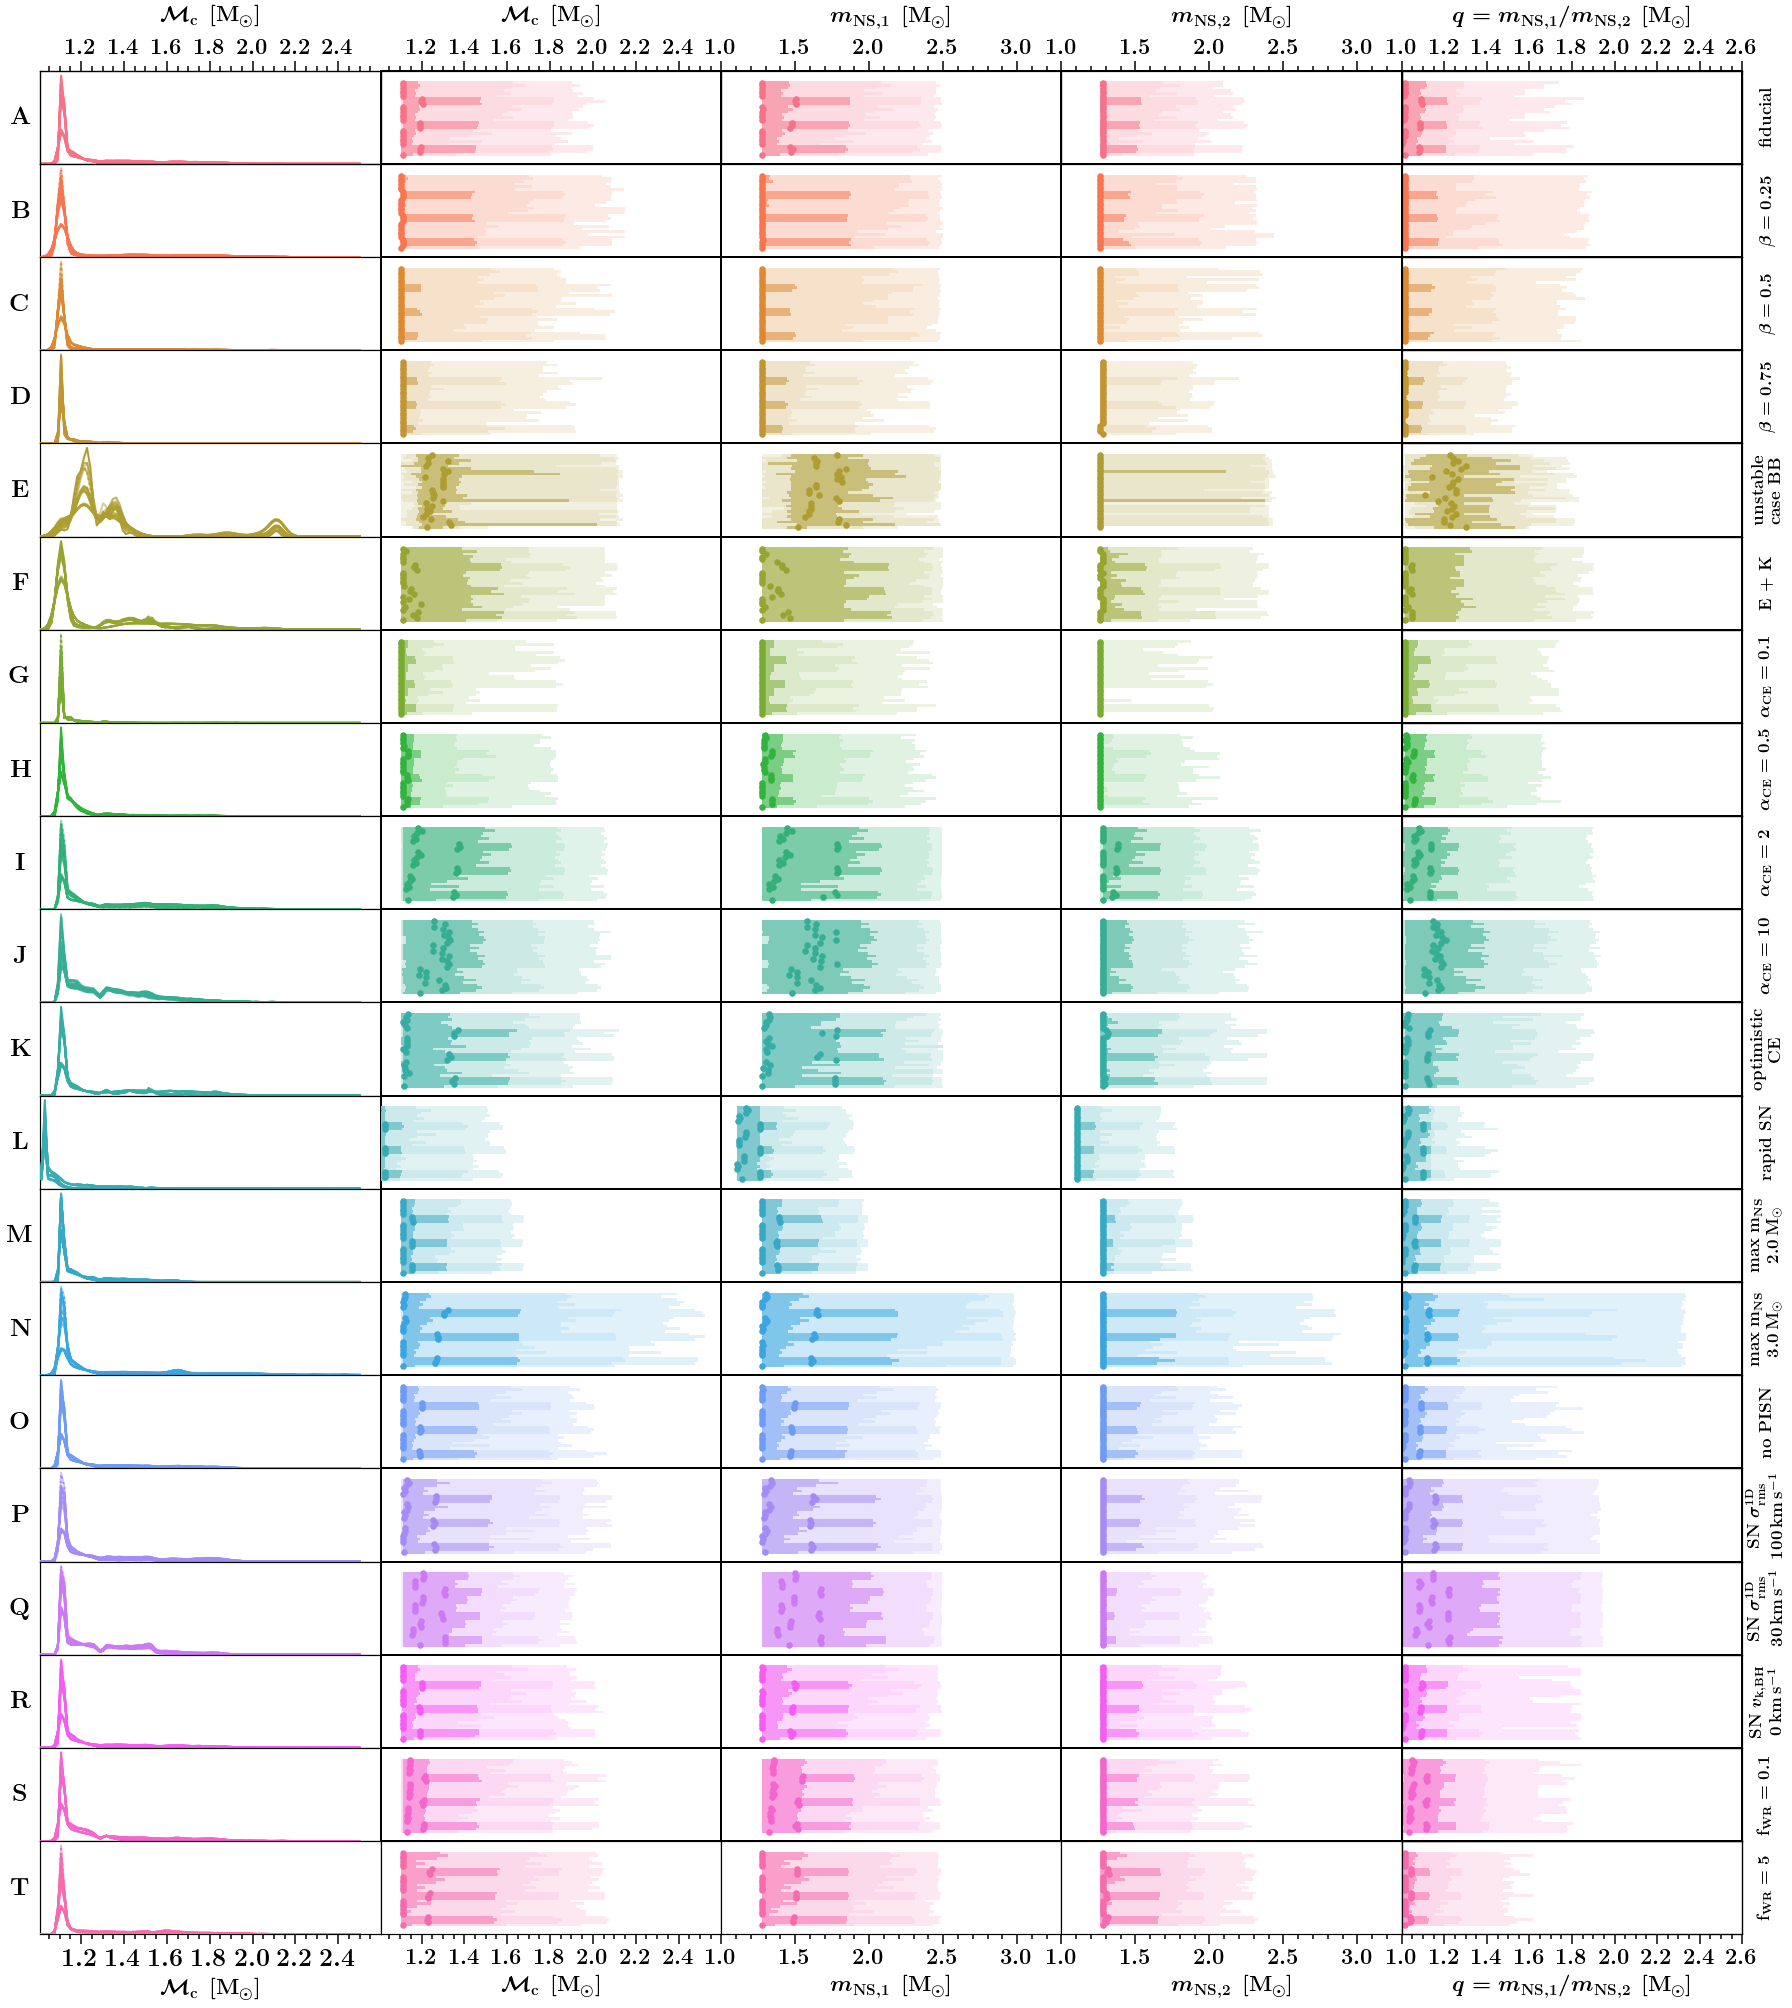

In [14]:
physicalNamesBPSmodelsWithEnter = [r'\textbf{fiducial}',\
                           r'$\beta=0.25$', r'$\beta=0.5$',  r'$\beta=0.75$',r'\textbf{unstable}' + '\n'+ r'\textbf{case BB}', r'\textbf{E + K}',\
                           r'$\alpha_{\rm{CE}}=0.1$', r'$\alpha_{\rm{CE}}=0.5$',  r'$\alpha_{\rm{CE}}=2$', r'$\alpha_{\rm{CE}}=10$',  r'\textbf{optimistic}' +'\n' + r'\textbf{CE}',\
                          r'\textbf{rapid SN}', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$2.0\,\rm{M}_{\odot}$', r'$\rm{max} \ m_{\rm{NS}}$' +'\n' + r'$3.0\,\rm{M}_{\odot}$',\
                          r'\textbf{no PISN}', r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$100\,\rm{km}\,\rm{s}^{-1}$',r'\textbf{SN} '+ r'$\sigma_{\rm{rms}}^{\rm{1D}}$' +'\n' + r'$30\,\rm{km}\,\rm{s}^{-1}$',\
                          r'\textbf{SN} '+ r'$v_{\rm{k,BH}}$' +'\n' + r'$0\,\rm{km}\,\rm{s}^{-1}$' , r'$\rm{f}_{\rm{WR}} = 0.1$', r'$\rm{f}_{\rm{WR}} = 5$']

alphabetPhysicalNameDictWithEnter =  {BPSnameslist[i]: physicalNamesBPSmodelsWithEnter[i] for i in range(len(BPSnameslist))}






# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 5,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(25,28), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BNS'
DCOtype='BNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
# nModels=20  # number of BPS models we are comparing
# BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 22



# FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# plot percentiles:
plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 2.5], \
                              whichWeight=whichWeight, path_dir=path_dir)
xlim=[1.01,2.599]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.01,2.599], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${m}_{\rm{NS,1}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,3.2999], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


##############################################################
## FOURTH COLUMN WITH MASS 2 ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${m}_{\rm{NS,2}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,3.2999], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)  # ticks
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label 

ax2x = ax[0,axe_ind].twiny()# top label 
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False) # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t) # top label 




##############################################################
## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {m}_{\rm{NS,1}} / {m}_{\rm{NS,2}}$ $ \,  [\rm{M}_{\odot}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.0,2.6], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
plt.savefig('./KDEplot_masses' + whichWeight +'_'  + DCOtype+ '.png', transparent=False)
plt.show()
plt.close()






In [ ]:
def plot_percentiles(axe=None, axe_ind=None, xparam='Mass1', BPSmodelNames=['A'], MSSFRmodelNames=['000'], DCOtype='BHNS',  \
                               whichWeight='det', path_dir='/Volumes/Andromeda/DATA/AllDCO_bugfix/', 
                  pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'):
    
    
    # by default available percentiles 
    quantileStrings = ['0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']

    # overall min and max of the percentiles. 
    minq0_005, minq0_05, minq0_25 = 100, 100, 100
    maxq0_75, maxq0_95, maxq0_995 = -10, -10, -10
    
    
    min_q0_5, max_q0_5 = 100, -10
    
    xvar_dict = {'Mtot':4,'Mass1':0, 'Mass2':1, 'q':6, 'ChirpMass':5, 'log10metallicitySystems':8, 'Z':7, 'tc':2, 'log10(tc)':3, 'tdelay':9, 'log10(tdelay)':10 }
    xvarind = xvar_dict[xparam] 
    
    xright =1+0.05
    xxx = (len(BPSnameslist)+xright)-1
    
    for ind_m, BPSmodelName in enumerate(BPSnameslist):

        color_m = colorDirDict[BPSmodelName]
        
        axe = ax[ind_m,axe_ind]
        dfname = pathQuantiles + 'distribution_percentiles_model_' + DCOtype +'_' + BPSmodelName + '.csv'
        df = pd.read_csv(dfname, header=[0], index_col=[0], skiprows=[1])


        
        dx = 0.4 #0.3
        dxrange = np.linspace(-dx, +dx, len(MSSFRmodelNames)+1) #+ ind_m
        dxlen = (2*dx)/len(MSSFRnameslist)
        


        for ind_mssfr, MSSFRname in enumerate(MSSFRmodelNames):

            key_  = xparam + '_' + MSSFRname 
            q0_005, q0_05, q0_25 = df.iloc[0:3][key_]# , df.iloc[1][key_], df.iloc[3][key_]
            q0_5  = df.iloc[4][key_]#[ind_mssfr]
            q0_75 = df.iloc[5][key_]#[ind_mssfr]
            q0_95 = df.iloc[7][key_]#[ind_mssfr]
            q0_995= df.iloc[8][key_]#[ind_mssfr]

                  
            
        
            minq0_005 = np.min([minq0_005, q0_005])
            minq0_05 = np.min([minq0_05, q0_05])
            minq0_25 = np.min([minq0_25, q0_25])
            min_q0_5 = np.min([min_q0_5, q0_5])
            
            maxq0_75 = np.max([maxq0_75, q0_75])
            maxq0_95 = np.max([maxq0_95, q0_95])
            maxq0_995 = np.max([maxq0_995, q0_995])
            max_q0_5 = np.max([max_q0_5, q0_5])
            

            
            for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):
                
                xx = dxrange[ind_mssfr]
                
                if interval=='median':                     
                    axe.scatter(q0_5, xx, \
                                c=np.array([color_m]), s=120, label=None, \
                                marker='.', zorder=200)  

                elif interval =='99percent':
                    zorder = 102
                    yy = [q0_005, q0_995]
                    alpha = 0.15
                elif interval=='90percent':
                    zorder = 105
                    yy = [q0_05, q0_95]
                    alpha = 0.25    
                elif interval=='50percent':
                    zorder = 110
                    yy = [q0_25, q0_75]
                    alpha = 0.4                         
                       
                axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color='white', alpha=1, \
                       height=dxlen, zorder=zorder-1)
                axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color=color_m, alpha=alpha, \
                       height=dxlen, zorder=zorder)

                
                    
                    
############        

#   PLOT OVERALL MIN & MAX QUANTILES>          
    xx = [-0.5, len(BPSnameslist)+xright]
    yymax90, yymin90 = [maxq0_95, maxq0_95],  [minq0_05, minq0_05]
    yymax99, yymin99 = [maxq0_995, maxq0_995],  [minq0_005, minq0_005]
    yymax50, yymin50 = [maxq0_75, maxq0_75],  [minq0_25, minq0_25]
    print('------')
    print(xparam)
    print('median =', min_q0_5, max_q0_5)
    print(r'90percentile = ', minq0_05, maxq0_95)
    print(r'99percentile = ', minq0_005, maxq0_995)
    print(r'50percentile = ', minq0_25, maxq0_75)
    
    for ind_m, BPSmodelName in enumerate(BPSnameslist):

        
        
        axe = ax[ind_m,axe_ind]    
    

        axe.fill_betweenx(xx, x1=yymin99, x2=yymax99,   color='white', zorder=0 , alpha =1 )
        axe.fill_betweenx(xx, x1=yymin99, x2=yymax99,   color='lightgray', zorder=1 , alpha =0.15 )

        axe.fill_betweenx(xx, x1=yymin90, x2=yymax90,  color='white', zorder=2 , alpha =1 )
        axe.fill_betweenx(xx, x1=yymin90, x2=yymax90,  color='lightgray', zorder=3 , alpha =0.5 )

        axe.fill_betweenx(xx, x1=yymin50, x2=yymax50,  color='white', zorder=4 , alpha =1 )     
        axe.fill_betweenx(xx, x1=yymin50, x2=yymax50,  color='lightgray', zorder=5 , alpha =0.8 )    


    
    
    return





In [ ]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 5,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BBH'
DCOtype='BBH'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 22



# FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 75], \
#                               whichWeight=whichWeight, path_dir=path_dir)
xlim=[1.01,69.99]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.01,69.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${M}_{\rm{BH,1}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,89.99], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


##############################################################
## FOURTH COLUMN WITH MASS 2 ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${M}_{\rm{BH,2}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,64.99], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)  # ticks
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label 

ax2x = ax[0,axe_ind].twiny()# top label 
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False) # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t) # top label 




##############################################################
## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {M}_{\rm{BH,1}} / {M}_{\rm{BH,2}}$ $ \,  [\rm{M}_{\odot}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.0,6.2], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)


# ##  SAVE FIG  ###
# plt.tight_layout()
# plt.subplots_adjust(wspace=0.0, hspace=0)  
# plt.savefig('./KDEplot_masses' + whichWeight +'_'  + DCOtype+ '.png', transparent=False)
# plt.show()
# plt.close()






In [ ]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'





ncols, nrows= 5,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})



# MSSFRalphas = [1., 0.5, 0.5, 0.5]
# MSSFRlinestyles = ['-'                        , '--'                         , ':'                           , '-.']

# MSSFRnameslist = ['000', '112', '212', '312', '113', '213', '313', '122', '222', '322', '123', '223', '323', '132', '232', '332', '133', '233', '333']



TYPE = 'BHNS'
DCOtype='BHNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'
fs_t = 22


# FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# # plot percentiles:
# ylim_max = plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 7], \
#                               whichWeight=whichWeight, path_dir=path_dir)

xlim=[1.01,6.999]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)


# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)



## FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'
mass_distribution_plot(ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 7],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 
xlim, ylim=[1.01,6.999], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
# bottom label 
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



## FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='Mass2',  2, r' ${M}_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.01,3.3999], [-0.5, 0.5]
mass_distribution_plot(axe=ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 3],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True)

# bottom label 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)




## FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='Mass1', 3,  r' ${M}_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.01,30.99999], [-0.5, 0.5]
mass_distribution_plot(axe=ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 31],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 

make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {M}_{\rm{BH}} / {M}_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'
mass_distribution_plot(axe=ax, axe_ind=axe_ind, xparam=xparam,  BPSmodelNames=BPSnameslist,\
        MSSFRmodelNames=MSSFRnameslist, DCOtype=TYPE, xvarrange=[1, 20],  labelname=xlabelname, \
                                whichWeight=whichWeight,  path_dir=path_dir, quantiles=True) 

xlim, ylim=[1.0,17.99999], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=16)





In [ ]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 5,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BNS'
DCOtype='BNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 22



# FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 2.5], \
#                               whichWeight=whichWeight, path_dir=path_dir)
xlim=[1.01,2.599]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.01,2.599], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${M}_{\rm{NS,1}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,3.2999], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


##############################################################
## FOURTH COLUMN WITH MASS 2 ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${M}_{\rm{NS,2}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,3.2999], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)  # ticks
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label 

ax2x = ax[0,axe_ind].twiny()# top label 
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False) # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t) # top label 




##############################################################
## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {M}_{\rm{NS,1}} / {M}_{\rm{NS,2}}$ $ \,  [\rm{M}_{\odot}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[1.0,2.6], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)









# METALLICITIES AND DELAY TIMES 

# BBH 

In [ ]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 3,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BBH'
DCOtype='BBH'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 21






##############################################################
# FIRST COLUMN WITH KDE  ###
xparam, axe_ind, xlabelname ='tdelay', 0,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
# plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 15], \
#                               whichWeight=whichWeight, path_dir=path_dir)
xlim=[1,14.99]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0, fontsize=fs_t)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='tdelay', 1,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[0,14.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='log10metallicitySystems', 2, r' $\log_{10}(Z_{\rm{i}})$ $ \, $' 
xlim, ylim = [np.log10(0.0001),  np.log10(0.0499)], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)
    
    
    
##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
# plt.savefig('./KDEplot_time_metallicity_' + whichWeight +'_'  + DCOtype+ '.png', transparent=False)
plt.show()
plt.close()






# BHNS 

In [ ]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 3,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BHNS'
DCOtype='BHNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 21






##############################################################
# FIRST COLUMN WITH KDE  ###
xparam, axe_ind, xlabelname ='tdelay', 0,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
# plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 15], \
#                               whichWeight=whichWeight, path_dir=path_dir)
xlim=[1,14.99]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0, fontsize=fs_t)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='tdelay', 1,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[0,14.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='log10metallicitySystems', 2, r' $\log_{10}(Z_{\rm{i}})$ $ \, $' 
xlim, ylim = [np.log10(0.0001),  np.log10(0.0499)], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)
    
    
    
##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
# plt.savefig('./KDEplot_time_metallicity_' + whichWeight +'_'  + DCOtype+ '.png', transparent=False)
plt.show()
plt.close()






# BNS 

In [ ]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 3,17
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BNS'
DCOtype='BNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 21






##############################################################
# FIRST COLUMN WITH KDE  ###
xparam, axe_ind, xlabelname ='tdelay', 0,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
# plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 15], \
#                               whichWeight=whichWeight, path_dir=path_dir)
xlim=[1,14.99]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0, fontsize=fs_t)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='tdelay', 1,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
xlim, ylim=[0,14.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='log10metallicitySystems', 2, r' $\log_{10}(Z_{\rm{i}})$ $ \, $' 
xlim, ylim = [np.log10(0.0001),  np.log10(0.0499)], [-0.5, 0.5]
plot_percentiles(ax, axe_ind, xparam, BPSnameslist, MSSFRnameslist, DCOtype,  whichWeight, path_dir, pathQuantiles)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)
    
    
    
##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
# plt.savefig('./KDEplot_time_metallicity_' + whichWeight +'_'  + DCOtype+ '.png', transparent=False)
plt.show()
plt.close()




